In [1]:
import pandas as pd
import os.path
import requests
from plotnine import *

%matplotlib inline

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
cols = ['userId', 'movieId', 'rating', 'timestamp']
ratings = pd.read_csv('../data/ml-10M100K/ratings.dat', delimiter='::', names=cols)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [3]:
ratings['ts'] = pd.to_datetime(ratings.timestamp * 1000000000)
ratings['ts_day'] = ratings.ts.values.astype('<M8[D]')
ratings['ts_dow'] = ratings.ts.dt.weekday_name
ratings['ts_hour'] = ratings.ts.dt.hour
ratings['rank_within_user'] = (ratings.groupby("userId")["timestamp"]
                                      .rank(ascending=True)
                                      .astype('int'))

In [4]:
ratings.head()

,userId,movieId,rating,timestamp,ts,ts_day,ts_dow,ts_hour,rank_within_user
0,1,122,5.0,838985046,1996-08-02 11:24:06,1996-08-02,Friday,11,22
1,1,185,5.0,838983525,1996-08-02 10:58:45,1996-08-02,Friday,10,6
2,1,231,5.0,838983392,1996-08-02 10:56:32,1996-08-02,Friday,10,3
3,1,292,5.0,838983421,1996-08-02 10:57:01,1996-08-02,Friday,10,5
4,1,316,5.0,838983392,1996-08-02 10:56:32,1996-08-02,Friday,10,3


Mean rating over time

In [5]:
sub = ratings.groupby('ts_day').rating.mean().reset_index()

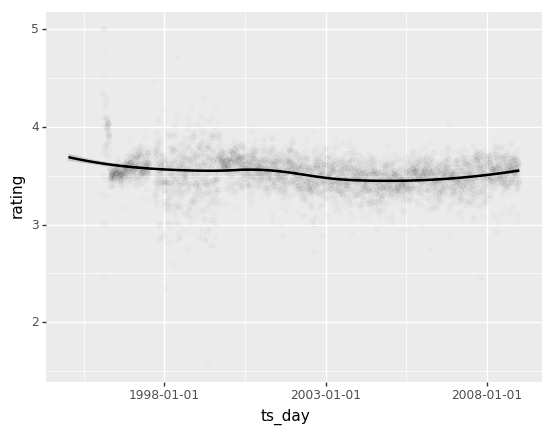

<ggplot: (-9223372036575050857)>

In [6]:
(ggplot(sub, aes('ts_day', 'rating'))
 + geom_smooth(method='loess')
 + geom_point(alpha=0.01))

Mean rating over time per user

In [7]:
sub = ratings.groupby('rank_within_user').rating.mean().reset_index()

/usr/local/lib/python3.6/site-packages/plotnine/layer.py:458: UserWarning: geom_point : Removed 3359 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


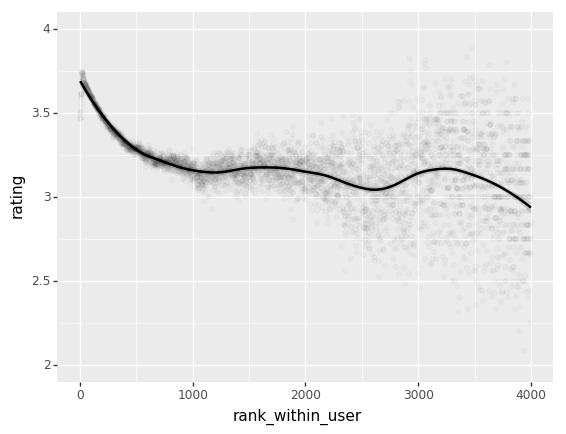

<ggplot: (-9223372036530856851)>

In [8]:
(ggplot(sub, aes('rank_within_user', 'rating'))
 + geom_smooth(method='loess', span=0.3)
 + geom_point(alpha=0.02)
 + xlim(0, 4000)
 + ylim(2, 4))

Mean rating by hour

In [9]:
sub = ratings.groupby('ts_hour').rating.mean().reset_index()

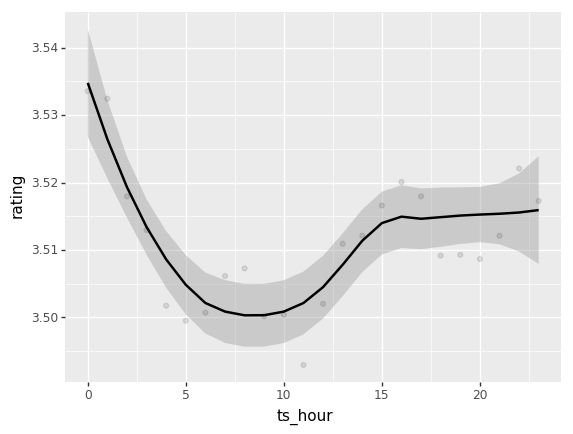

<ggplot: (464685176)>

In [11]:
(ggplot(sub, aes('ts_hour', 'rating'))
 + geom_smooth(method='loess')
 + geom_point(alpha=0.1))